# Dynamic Programming
- Documentation: https://gymnasium.farama.org/environments/toy_text/frozen_lake/
- You task is to fill all '# TODO' sections, so the Notebook can run from top to bottom
- Your allowed to edit any given code, but I recommend to use the existing structures
- Have a look to the existing outputs. Your outputs should have a simillar structure

### Prerequisites
- Install packages numpy, gymnasium

In [2]:
import time
import numpy
import random
import gymnasium
import gymnasium.envs.toy_text.frozen_lake
from typing import Callable, NamedTuple, SupportsFloat
numpy.set_printoptions(precision=4)

### Create and watch environment

In [3]:
def CreateEnvironment(render : bool) -> gymnasium.Env:
    """Creates the environment were an agent can interact with"""
    renderMode ="human" if render else None
    map = gymnasium.envs.toy_text.frozen_lake.generate_random_map(size=4)
    environment = gymnasium.make('FrozenLake-v1', desc=map, is_slippery=True, render_mode=renderMode)
    return environment

In [4]:
env = CreateEnvironment(True)
for i in range(3):
    env.reset()
    while(True):
        action = env.action_space.sample()
        nextState, reward, terminated, truncated, info = env.step(action)
        if (terminated or truncated):
            break

env.close()


<frozen importlib._bootstrap>:488: RuntimeWarning: Your system is avx2 capable but pygame was not built with support for it. The performance of some of your blits could be adversely affected. Consider enabling compile time detection with environment variables like PYGAME_DETECT_AVX2=1 if you are compiling without cross compilation.


### Environmental behaviour

In [5]:
class Prediction(NamedTuple):
    """One possible outcome for a given action within a state"""
    Probability: float
    NextState : tuple[int, int]
    NextReward : float

class EnvBehaviour:
    """Helper methods for defining the environment behaviour"""

    def MapLayout(env: gymnasium.Env) -> numpy.ndarray:
        """Returns the data array that holds the current map layout"""
        return env.unwrapped.desc

    def IsTerminal(layout: numpy.ndarray, state: tuple[int, int]) -> bool:
        """Determines if the given state is a terminal state in the current layout"""
        return layout[state] in [b'H', b'G']

    def MapReward(field: bytes) -> float:
        """Assigns a reward to each field type"""

        # TODO Return +99 for the chest, -99 for holes and otherwise 0

        if field == b'H':
            return -99.0
        elif field == b'G':
            return 99.0
        else:
            return -1.0
    #print(MapReward(b'H'))
    def Predict(env: gymnasium.Env, state: tuple[int, int], action: int) -> list[Prediction]:
        """Returns all possible transition for a given action in a state. This is p(s',r | s,a)"""

        # TODO Acount for invalid actions
        #       - They transition to themself

        # TODO Acount for terminal states
        #       - They dont have transitions

        # TODO Account for the 'is_slippery' rules!

        # TODO Use 'MapReward' to get the reward for the transition

        layout = EnvBehaviour.MapLayout(env)
        predictions = []

        if (EnvBehaviour.IsTerminal(layout,state)):
            print('its a terminal state')
            return []
        else:

            if action == 0:
                #move left
                #moves left/ slips up or down


                #left move prediction
                if state[1]==0:  #left edge case
                    leftPosition = state
                else:
                    leftPosition = state[0],state[1]-1
                predictions.append(Prediction(0.33, leftPosition,EnvBehaviour.MapReward(layout[leftPosition])))



                #move down prediction
                if state[0]==3:   #bottom edge case
                    downPosition = state                    
                else:
                    
                    downPosition = state[0]+1,state[1]  

                predictions.append(Prediction(0.33, downPosition,EnvBehaviour.MapReward(layout[downPosition])))

                #move up prediction
                if state[0]==0:   #top edge case
                    upPosition = state
                else:
                    upPosition  = state[0]-1, state[1]

                predictions.append(Prediction(0.33, upPosition,EnvBehaviour.MapReward(layout[upPosition])))
                

                
            if action == 1:
                #move down
                #moves down/ slips left or right


                #move down prediction
                if state[0]==3:   #bottom edge case
                    downPosition = state                    
                else:
                    
                    downPosition = state[0]+1,state[1]  
                predictions.append(Prediction(0.33, downPosition,EnvBehaviour.MapReward(layout[downPosition])))

                #move left prediction
                if state[1]==0:  #left edge case
                    leftPosition = state
                else:
                    leftPosition = state[0],state[1]-1
                predictions.append(Prediction(0.33, leftPosition,EnvBehaviour.MapReward(layout[leftPosition])))


                #move right prediction
                if state[1]==3: #right edge case
                    rightPosition = state
                else:
                    rightPosition  = state[0], state[1]+1
                predictions.append(Prediction(0.33, rightPosition,EnvBehaviour.MapReward(layout[rightPosition])))
                

                
            if action == 2:
                #move right
                #moves right/ slips up or down

                #move right prediction
                if state[1]==3: #right edge case
                    rightPosition = state
                else:
                    rightPosition  = state[0], state[1]+1
                predictions.append(Prediction(0.33, rightPosition,EnvBehaviour.MapReward(layout[rightPosition])))

                #move up prediction
                if state[0]==0:   #top edge case
                    upPosition = state
                else:
                    upPosition  = state[0]-1, state[1]
                predictions.append(Prediction(0.33, upPosition,EnvBehaviour.MapReward(layout[upPosition])))

                #move down prediction
                if state[0]==3:   #bottom edge case
                    downPosition = state                    
                else:
                    
                    downPosition = state[0]+1,state[1]  
                predictions.append(Prediction(0.33, downPosition,EnvBehaviour.MapReward(layout[downPosition])))

                

            if action == 3:
                #move up
                #moves up/ slips right or left

                #move up prediction
                if state[0]==0:   #top edge case
                    upPosition = state
                else:
                    upPosition  = state[0]-1, state[1]
                predictions.append(Prediction(0.33, upPosition,EnvBehaviour.MapReward(layout[upPosition])))


                #move right prediction
                if state[1]==3: #right edge case
                    rightPosition = state
                else:
                    rightPosition  = state[0], state[1]+1
                predictions.append(Prediction(0.33, rightPosition,EnvBehaviour.MapReward(layout[rightPosition])))


                #move left prediction
                if state[1]==0:  #left edge case
                    leftPosition = state
                else:
                    leftPosition = state[0],state[1]-1
                predictions.append(Prediction(0.33, leftPosition,EnvBehaviour.MapReward(layout[leftPosition])))

                

            return predictions





In [6]:
layout = EnvBehaviour.MapLayout(env)
print('layout:')
print (layout)
print('isTerminal?')
print(EnvBehaviour.IsTerminal(layout, (0,0)))

print('prediction for state (0,0) and action 3:')
prediction = EnvBehaviour.Predict(env,(0,0),3)
print(prediction)

print(prediction[0].NextState[0])
print([prediction[0].NextState[1]])


print(EnvBehaviour.IsTerminal(layout, (prediction[0].NextState[0],prediction[0].NextState[1])))

# EnvBehaviour.IsTerminal([prediction[0].NextState[0]][prediction[0].NextState[1]])


layout:
[[b'S' b'F' b'H' b'F']
 [b'F' b'F' b'F' b'F']
 [b'F' b'F' b'F' b'F']
 [b'F' b'F' b'F' b'G']]
isTerminal?
False
prediction for state (0,0) and action 3:
[Prediction(Probability=0.33, NextState=(0, 0), NextReward=-1.0), Prediction(Probability=0.33, NextState=(0, 1), NextReward=-1.0), Prediction(Probability=0.33, NextState=(0, 0), NextReward=-1.0)]
0
[0]
False


In [7]:

# env_behaviour = EnvBehaviour()

# layout = env_behaviour.MapLayout(env)
# print(layout)

# print(env_behaviour.IsTerminal(layout,(0,2)))

# print(env_behaviour.MapReward(layout[0,2]))

# env_behaviour.Predict(env,(0,0),3)

### Value iteration

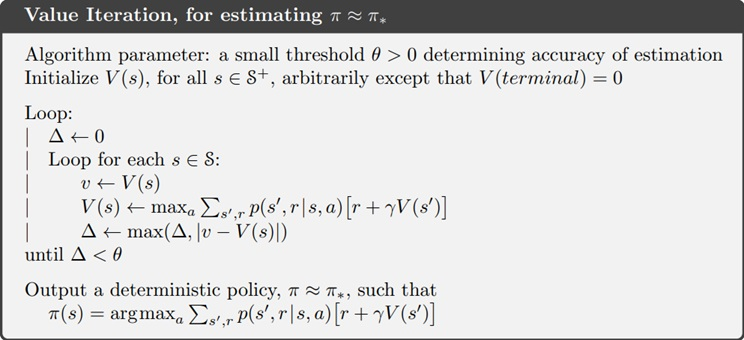

In [7]:
class EnvSolver:
    def InitStateValueTable(env: gymnasium.Env) -> numpy.ndarray:
        """Initializes the state value table"""

        # TODO Return a 2D data array that will hold later estimated state returns for each possible state
        # TODO Do not use 'float', use 'int' as data type for the table
        return numpy.zeros((4,4), dtype=int)

    def EstimateReturns(env: gymnasium.Env, vTable: numpy.ndarray, state: tuple[int, int]) -> numpy.ndarray:
        """Computes the estimated return for each action in the given state"""

        # TODO Compute the estimated return for all actions given the current state.
        #       - This is the sum for each action of p(s',r | s,a)
        #       - If the next state is a terminal state, do not lookup the value table
        gamma = 0.99
        Reward = numpy.zeros(4)
        Predictions = []
        for action in range(4):
            prediction = EnvBehaviour.Predict(env, state, action)
            Predictions.append(prediction)
            action_reward = 0
            for i in range(3):
                reward = prediction[i].Probability*prediction[i].NextReward
                # print('reward:')
                # print(reward)
                
                nextStateIndex = prediction[i].NextState[0],prediction[i].NextState[1] 
                if not EnvBehaviour.IsTerminal(layout, nextStateIndex) :
                    reward = reward + (prediction[i].Probability*gamma*(vTable[prediction[i].NextState[0]][prediction[i].NextState[1]]))
                action_reward+=reward

            Reward[action]=action_reward
            
        return Reward

    def Sweep(env: gymnasium.Env, vTable: numpy.ndarray) -> float:
        """Updates the the optimal estimated return for each possible state"""

        # TODO Iterate through every state once
        #       - Update the estimated state value
        #       - Use the best next action return as new value

        

        # TODO Account for terminal states
        #       - They cannot have estimated returns
        #       - Their return is the reward for the field itself

        # TODO return a delta that holds the largest change of the sweep


        delta = 0.0
        rows, cols = vTable.shape
        for i in range(rows):
            for j in range(cols):
                state = (i, j)
                if EnvBehaviour.IsTerminal(EnvBehaviour.MapLayout(env), state):
                    continue  # Skip terminal states
                old_value = vTable[i][j]
                returns = EnvSolver.EstimateReturns(env, vTable, state)
                new_value = numpy.max(returns)
                
                delta = max(delta, abs(old_value - new_value))


                vTable[i][j] = new_value
                # print('new value of state:')
                # print(state)
                # print(new_value)
                # print('should be in vTable')
                # print(vTable)

        # print('final vTable from Sweep function')
        # print(vTable)
        return delta

    def Solve(env: gymnasium.Env, minDetla: float = 1e-0, maxSweeps: int = 1e+2) -> numpy.ndarray:
        """Iterates until convergence or the sweep limit is reached"""

        # TODO Solve the current environment
        #       - Initialize the state value table with 'InitStateValueTable'
        #       - Repeat calling 'Sweep' until 'maxSweeps' or 'minDetla' reached

        # TODO Print the final table with the last delta and sweep count

        vTable = EnvSolver.InitStateValueTable(env)
        sweep_count = 0
        delta = 0.0

        while sweep_count < maxSweeps:
            delta = EnvSolver.Sweep(env, vTable)
            # print(delta)
            # print(vTable)
            sweep_count += 1
            if delta < minDetla:
                break

        print(f"Final value table after {sweep_count} sweeps with last delta {delta}:")
        print(vTable)
        return vTable






# vTable = EnvSolver.Solve(env)

In [8]:



print('layout:')
print(layout)

vTable = EnvSolver.InitStateValueTable(env)
print(vTable)

 


print(vTable[prediction[i].NextState[0]][prediction[i].NextState[1]])


nextStateIndex = prediction[0].NextState[0],prediction[0].NextState[1] 
print('nextStateIndex')
print(nextStateIndex)

print('prediction for state (0,0) and action 0:')
prediction = EnvBehaviour.Predict(env,(0,0),0)
print(prediction)




print('prediction for state (0,0) and action 1:')
prediction = EnvBehaviour.Predict(env,(0,0),1)
print(prediction)

print('prediction for state (0,0) and action 2:')
prediction = EnvBehaviour.Predict(env,(0,0),2)
print(prediction)

print('prediction for state (0,0) and action 3:')
prediction = EnvBehaviour.Predict(env,(0,0),3)
print(prediction)

print('estimated returns for state (0,0):')

print(EnvSolver.EstimateReturns(env,vTable,(0,0)))

print(' sweep function:')
EnvSolver.Sweep(env,vTable)

print('solve:')
EnvSolver.Solve(env)



layout:
[[b'S' b'F' b'H' b'F']
 [b'F' b'F' b'F' b'F']
 [b'F' b'F' b'F' b'F']
 [b'F' b'F' b'F' b'G']]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
0
nextStateIndex
(0, 0)
prediction for state (0,0) and action 0:
[Prediction(Probability=0.33, NextState=(0, 0), NextReward=-1.0), Prediction(Probability=0.33, NextState=(1, 0), NextReward=-1.0), Prediction(Probability=0.33, NextState=(0, 0), NextReward=-1.0)]
prediction for state (0,0) and action 1:
[Prediction(Probability=0.33, NextState=(1, 0), NextReward=-1.0), Prediction(Probability=0.33, NextState=(0, 0), NextReward=-1.0), Prediction(Probability=0.33, NextState=(0, 1), NextReward=-1.0)]
prediction for state (0,0) and action 2:
[Prediction(Probability=0.33, NextState=(0, 1), NextReward=-1.0), Prediction(Probability=0.33, NextState=(0, 0), NextReward=-1.0), Prediction(Probability=0.33, NextState=(1, 0), NextReward=-1.0)]
prediction for state (0,0) and action 3:
[Prediction(Probability=0.33, NextState=(0, 0), NextReward=-1.0), Prediction(P

array([[45, 46,  0, 57],
       [51, 55, 61, 66],
       [55, 61, 71, 81],
       [57, 66, 81,  0]])

### Agent behaviour

In [9]:
class Agent:
    """Manages all data and behaviour to interact within a environment"""

    StateValueTable : numpy.ndarray
    """Holds the estimates or return for each possible state"""

    GymEnv : gymnasium.Env
    """Envornment where the agent is attached to"""

    def __init__(self, env: gymnasium.Env):
        """Initializes the state value table and sets the environment"""
        self.GymEnv = env
        self.StateValueTable = EnvSolver.Solve(env)

    def Policy(self, state: tuple[int, int]) -> int:
        """Chooses the next action to take in the environment"""

        # TODO Implement a greedy policy
        # TODO Use 'EstimateReturns' to get the action estimates
        # TODO Choose on randomly on ties
        returns = EnvSolver.EstimateReturns(self.GymEnv, self.StateValueTable, state)
        # print('returns:')
        # print(returns)
        
        # Find all actions with the maximum return value
        max_value = numpy.max(returns)
        # print('max of return:')
        # print(max_value)
        best_actions = numpy.where(returns == max_value)[0]  # [0] to get indices
        
        # Randomly select among tied best actions
        return numpy.random.choice(best_actions)


env = CreateEnvironment(False)
print(env.unwrapped.desc)
agent = Agent(env)
# action = agent.Policy((0, 1))
# print(f"Chosen action for state (0,0): {action}")

[[b'S' b'H' b'H' b'F']
 [b'F' b'F' b'F' b'H']
 [b'F' b'H' b'F' b'F']
 [b'F' b'F' b'F' b'G']]
Final value table after 28 sweeps with last delta 0.9984000000000002:
[[  9   0   0 -94]
 [ 15 -40 -36   0]
 [ 28   0  31  62]
 [ 48  57  74   0]]


### Watch the result

In [10]:
print(env.unwrapped.desc)
action = agent.Policy((1, 0))
print(f"Chosen action for state (2,1): {action}")

[[b'S' b'H' b'H' b'F']
 [b'F' b'F' b'F' b'H']
 [b'F' b'H' b'F' b'F']
 [b'F' b'F' b'F' b'G']]
Chosen action for state (2,1): 0


In [11]:
def EncodeState(env: gymnasium.Env, state: any) -> numpy.ndarray:
    return tuple(numpy.unravel_index(state, EnvBehaviour.MapLayout(env).shape))

for _ in range(5):
    env = CreateEnvironment(True)
    agent = Agent(env)
    state, info = env.reset()

    while(True):
        state = EncodeState(env, state)
        action = agent.Policy(state)
        state, reward, terminated, truncated, info = env.step(action)
        if terminated or truncated:
            break
env.close()

Final value table after 28 sweeps with last delta 0.9868000000000023:
[[26 27 24  0]
 [32 34 51 61]
 [38  0 67 79]
 [52 61 79  0]]
Final value table after 25 sweeps with last delta 0.9951000000000008:
[[33 35 47 55]
 [38 45 57 64]
 [39 48 69 80]
 [32  0 80  0]]
Final value table after 20 sweeps with last delta 0.9951000000000008:
[[  0   0  10   0]
 [  0 -22  34  50]
 [-26   0  59  75]
 [ 48  57  75   0]]
Final value table after 11 sweeps with last delta 0.99:
[[  0   0 -33   0]
 [  0 -32   0   0]
 [  0   2  43  67]
 [  0   0  67   0]]
Final value table after 28 sweeps with last delta 0.9984000000000002:
[[  9   3   0   0]
 [ 15   3  -3   0]
 [ 28   0 -10   0]
 [ 48  57  74   0]]
